<h2 style="color: red;">Project Mattress Inclub Sales Predication by using Pycaret Regression</h2> 

<h2 style="color: red;">   </h2> 

In [3]:
# Importing Libraries




import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
from pycaret.regression import *

In [56]:
# Loading Data set

my_data = pd.read_excel("D:/Sai Kumar/01.Projects/Sleepy_Matters/01.SC Data/01.Sams Club FinalData_INCLUB & ONLINE_V1_15.09.2024 (For Modelling).xlsx", sheet_name = "SC_INCLUB_Sales Wave3")

In [7]:
my_data.shape

(1977, 150)

In [8]:
my_data.head()

,Week_No_New,Start_Date,End_Date,Quarter_split,Brand,Type,Sub_Brand_New,Size_New,ONLINE_INCLUB,_FREQ_,Sales_Unit_Qty,Sales_Value,AVGPRICE,MF_Beautyrest_COOP_Digital_Occ,MF_Beautyrest_COOP_OLV_Occ,MF_Beautyrest_COOP_Print_Occ,MF_Beautyrest_COOP_TV_Occ,MF_Others_COOP_Digital_Occ,MF_Others_COOP_OLV_Occ,MF_Others_COOP_Print_Occ,MF_Others_COOP_TV_Occ,MF_Serta_COOP_Digital_Occ,MF_Serta_COOP_OLV_Occ,MF_Serta_COOP_Print_Occ,MF_Serta_COOP_TV_Occ,Natl_Beautyrest_COOP_Digital_Occ,Natl_Beautyrest_COOP_OLV_Occ,Natl_Beautyrest_COOP_Print_Occ,Natl_Beautyrest_COOP_TV_Occ,Natl_Others_COOP_Digital_Occ,Natl_Others_COOP_OLV_Occ,Natl_Others_COOP_Print_Occ,Natl_Others_COOP_TV_Occ,Natl_Serta_COOP_Digital_Occ,Natl_Serta_COOP_OLV_Occ,Natl_Serta_COOP_Print_Occ,Natl_Serta_COOP_TV_Occ,SC_Beautyrest_COOP_Digital_Occ,SC_Others_COOP_Digital_Occ,SC_Others_COOP_OLV_Occ,SC_Serta_COOP_Digital_Occ,SC_Serta_COOP_OLV_Occ,SC_Serta_COOP_TV_Occ,MF_Beautyrest_COOP_Social_Occ,MF_Others_COOP_Social_Occ,Natl_Beautyrest_COOP_Social_Occ,Natl_Others_COOP_Social_Occ,Natl_Serta_COOP_Social_Occ,BR_AvgAppetiteScore,BR_Black_AvgAppetiteScore,BR_Harmony_AvgAppetiteScore,Others_AvgAppetiteScore,Serta_AvgAppetiteScore,Serta_iComfort_AvgAppetiteScore,Serta_PerfectSleeper_AvgAppetiteScore,TNN_AvgAppetiteScore,BR_SumIndexedVol,BR_Black_SumIndexedVol,BR_Harmony_SumIndexedVol,Others_SumIndexedVol,Serta_SumIndexedVol,Serta_iComfort_SumIndexedVol,Serta_PerfectSleeper_SumIndexedVol,TNN_SumIndexedVol,BR_AvgAppetiteScore_Tot,Serta_AvgAppetiteScore_Tot,BR_SumIndexedVol_Tot,Serta_SumIndexedVol_Tot,MF_BR_Others_Rep_Promo,MF_Others_Rep_Promo,MF_Serta_Others_Rep_Promo,MF_Serta_PerfectSleeper_Rep_Promo,Natl_BR_Black_Rep_Promo,Natl_BR_Harmony_Rep_Promo,Natl_BR_Others_Rep_Promo,Natl_Others_Rep_Promo,Natl_Serta_iComfort_Rep_Promo,Natl_Serta_Others_Rep_Promo,Natl_Serta_PerfectSleeper_Rep_Promo,SC_Others_Rep_Promo,SC_Serta_Others_Rep_Promo,SC_Serta_PerfectSleeper_Rep_Promo,MF_BR_Beyond_Net_Promo,MF_BR_Black_Net_Promo,MF_BR_Others_Net_Promo,MF_Others_Net_Promo,MF_Serta_iComfort_Net_Promo,MF_Serta_Others_Net_Promo,MF_Serta_PerfectSleeper_Net_Promo,Natl_BR_Black_Net_Promo,Natl_BR_Harmony_Net_Promo,Natl_BR_Others_Net_Promo,Natl_Others_Net_Promo,Natl_Serta_iComfort_Net_Promo,Natl_Serta_Others_Net_Promo,Natl_Serta_PerfectSleeper_Net_Promo,SC_BR_Black_Net_Promo,SC_BR_Others_Net_Promo,SC_Others_Net_Promo,SC_Serta_iComfort_Net_Promo,SC_Serta_Others_Net_Promo,SC_Serta_PerfectSleeper_Net_Promo,SC_BR_Harmony_Net_Promo,MF_BR_Rep_Promo,MF_Serta_Rep_Promo,Natl_BR_Rep_Promo,Natl_Serta_Rep_Promo,SC_Serta_Rep_Promo,MF_BR_Net_Promo,MF_Serta_Net_Promo,Natl_BR_Net_Promo,Natl_Serta_Net_Promo,SC_BR_Net_Promo (No Need),SC_Serta_Net_Promo,DISTRIBUTION (> 0 %),EF_HousingUnits,EF_Mortgage,EF_Income,EF_Unemployment,EF_CPI,Serta_PerfectSleeper_TV_Spend_70_Calc,Serta_iComfort_DIGITAL_Spend_80_Calc,Serta_iComfort_TV_Spend_70_Calc,Serta_Others_DIGITAL_Spend_80_Calc,Serta_Others_OLV_Spend_70_Calc,Serta_Others_TV_Spend_70_Calc,Serta_Others_RADIO_Spend_80_Calc,SC_DIGITAL_Spend_80_Calc,SC_OLV_Spend_70_Calc,SC_TV_Spend_70_Calc,SC_RADIO_Spend_80_Calc,COMP_DIGITAL_Spend_80_Calc,COMP_OLV_Spend_70_Calc,COMP_TV_Spend_70_Calc,COMP_RADIO_Spend_80_Calc,Ret_DIGITAL_Spend_80_Calc,Ret_OLV_Spend_70_Calc,Ret_TV_Spend_70_Calc,Ret_PRINT_Spend_70_Calc,Ret_RADIO_Spend_80_Calc,BR_PSocial_Imp_70,BR_CTV_Imp_70,Serta_PSocial_Imp_70,Serta_CTV_Imp_70,BR_Org_Search_Visit_80,BR_PSearch_Imp_80,BR_Direct_Visit_80,Serta_Org_Search_Visit_80,Serta_PSearch_Imp_80,Serta_Direct_Visit_80
0,7,2019-02-11,2019-02-17,2019-1Q,SERTA,Mattress,SERTA_OTHERS,CALKING,INCLUB,1,1,499.0,499,3.75,0.00,20.75,4410.50,41.00,0.00,21.75,5204.75,5.00,0.00,17.50,4279.50,966.50,0.00,97.25,2941.50,1439.25,2.00,208.00,12254.25,194.25,0.0,102.00,3041.00,43.00,72.00,0.0,84.00,0.0,0.0,0,0.0,0.0,0.0,0.0,45.10,23.12,0.0,22.33,35.39,35.39,14.09,13.01,17289.56,1089.78,0.0,185968.88,64749.38,64749.38,157.77,597.11,68.22,84.87,18379.34,129656.53,0.23,0.23,0.20,0.0,0.0,0.0,0.60,0.34,0.0,0.6,0.0,0.0,0.0,0.0

In [9]:
my_data.tail()

,Week_No_New,Start_Date,End_Date,Quarter_split,Brand,Type,Sub_Brand_New,Size_New,ONLINE_INCLUB,_FREQ_,Sales_Unit_Qty,Sales_Value,AVGPRICE,MF_Beautyrest_COOP_Digital_Occ,MF_Beautyrest_COOP_OLV_Occ,MF_Beautyrest_COOP_Print_Occ,MF_Beautyrest_COOP_TV_Occ,MF_Others_COOP_Digital_Occ,MF_Others_COOP_OLV_Occ,MF_Others_COOP_Print_Occ,MF_Others_COOP_TV_Occ,MF_Serta_COOP_Digital_Occ,MF_Serta_COOP_OLV_Occ,MF_Serta_COOP_Print_Occ,MF_Serta_COOP_TV_Occ,Natl_Beautyrest_COOP_Digital_Occ,Natl_Beautyrest_COOP_OLV_Occ,Natl_Beautyrest_COOP_Print_Occ,Natl_Beautyrest_COOP_TV_Occ,Natl_Others_COOP_Digital_Occ,Natl_Others_COOP_OLV_Occ,Natl_Others_COOP_Print_Occ,Natl_Others_COOP_TV_Occ,Natl_Serta_COOP_Digital_Occ,Natl_Serta_COOP_OLV_Occ,Natl_Serta_COOP_Print_Occ,Natl_Serta_COOP_TV_Occ,SC_Beautyrest_COOP_Digital_Occ,SC_Others_COOP_Digital_Occ,SC_Others_COOP_OLV_Occ,SC_Serta_COOP_Digital_Occ,SC_Serta_COOP_OLV_Occ,SC_Serta_COOP_TV_Occ,MF_Beautyrest_COOP_Social_Occ,MF_Others_COOP_Social_Occ,Natl_Beautyrest_COOP_Social_Occ,Natl_Others_COOP_Social_Occ,Natl_Serta_COOP_Social_Occ,BR_AvgAppetiteScore,BR_Black_AvgAppetiteScore,BR_Harmony_AvgAppetiteScore,Others_AvgAppetiteScore,Serta_AvgAppetiteScore,Serta_iComfort_AvgAppetiteScore,Serta_PerfectSleeper_AvgAppetiteScore,TNN_AvgAppetiteScore,BR_SumIndexedVol,BR_Black_SumIndexedVol,BR_Harmony_SumIndexedVol,Others_SumIndexedVol,Serta_SumIndexedVol,Serta_iComfort_SumIndexedVol,Serta_PerfectSleeper_SumIndexedVol,TNN_SumIndexedVol,BR_AvgAppetiteScore_Tot,Serta_AvgAppetiteScore_Tot,BR_SumIndexedVol_Tot,Serta_SumIndexedVol_Tot,MF_BR_Others_Rep_Promo,MF_Others_Rep_Promo,MF_Serta_Others_Rep_Promo,MF_Serta_PerfectSleeper_Rep_Promo,Natl_BR_Black_Rep_Promo,Natl_BR_Harmony_Rep_Promo,Natl_BR_Others_Rep_Promo,Natl_Others_Rep_Promo,Natl_Serta_iComfort_Rep_Promo,Natl_Serta_Others_Rep_Promo,Natl_Serta_PerfectSleeper_Rep_Promo,SC_Others_Rep_Promo,SC_Serta_Others_Rep_Promo,SC_Serta_PerfectSleeper_Rep_Promo,MF_BR_Beyond_Net_Promo,MF_BR_Black_Net_Promo,MF_BR_Others_Net_Promo,MF_Others_Net_Promo,MF_Serta_iComfort_Net_Promo,MF_Serta_Others_Net_Promo,MF_Serta_PerfectSleeper_Net_Promo,Natl_BR_Black_Net_Promo,Natl_BR_Harmony_Net_Promo,Natl_BR_Others_Net_Promo,Natl_Others_Net_Promo,Natl_Serta_iComfort_Net_Promo,Natl_Serta_Others_Net_Promo,Natl_Serta_PerfectSleeper_Net_Promo,SC_BR_Black_Net_Promo,SC_BR_Others_Net_Promo,SC_Others_Net_Promo,SC_Serta_iComfort_Net_Promo,SC_Serta_Others_Net_Promo,SC_Serta_PerfectSleeper_Net_Promo,SC_BR_Harmony_Net_Promo,MF_BR_Rep_Promo,MF_Serta_Rep_Promo,Natl_BR_Rep_Promo,Natl_Serta_Rep_Promo,SC_Serta_Rep_Promo,MF_BR_Net_Promo,MF_Serta_Net_Promo,Natl_BR_Net_Promo,Natl_Serta_Net_Promo,SC_BR_Net_Promo (No Need),SC_Serta_Net_Promo,DISTRIBUTION (> 0 %),EF_HousingUnits,EF_Mortgage,EF_Income,EF_Unemployment,EF_CPI,Serta_PerfectSleeper_TV_Spend_70_Calc,Serta_iComfort_DIGITAL_Spend_80_Calc,Serta_iComfort_TV_Spend_70_Calc,Serta_Others_DIGITAL_Spend_80_Calc,Serta_Others_OLV_Spend_70_Calc,Serta_Others_TV_Spend_70_Calc,Serta_Others_RADIO_Spend_80_Calc,SC_DIGITAL_Spend_80_Calc,SC_OLV_Spend_70_Calc,SC_TV_Spend_70_Calc,SC_RADIO_Spend_80_Calc,COMP_DIGITAL_Spend_80_Calc,COMP_OLV_Spend_70_Calc,COMP_TV_Spend_70_Calc,COMP_RADIO_Spend_80_Calc,Ret_DIGITAL_Spend_80_Calc,Ret_OLV_Spend_70_Calc,Ret_TV_Spend_70_Calc,Ret_PRINT_Spend_70_Calc,Ret_RADIO_Spend_80_Calc,BR_PSocial_Imp_70,BR_CTV_Imp_70,Serta_PSocial_Imp_70,Serta_CTV_Imp_70,BR_Org_Search_Visit_80,BR_PSearch_Imp_80,BR_Direct_Visit_80,Serta_Org_Search_Visit_80,Serta_PSearch_Imp_80,Serta_Direct_Visit_80
1972,179,2022-05-30,2022-06-05,2022-2Q,SERTA,MiB,SERTA_OTHERS,TWIN,INCLUB,470,1308,327179.37,251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.11,0.00,0.26,0.09,0.15,0.29,0.0,0.0,0.0,0.0,0.00,0.00,0.38,0.0,0.00,0.00,0.9,0.0,1.06,1.11,0.0,1.13,0.73,0.11,0.00,0.26,0.0,0.00,0.17,0.00,0.0,0.0,0.18,0.5

In [12]:
my_data['Sales_Unit_Qty'].sum()

1815369

In [13]:
list(my_data.columns)

['Week_No_New',
 'Start_Date',
 'End_Date',
 'Quarter_split',
 'Brand',
 'Type',
 'Sub_Brand_New',
 'Size_New',
 'ONLINE_INCLUB',
 '_FREQ_',
 'Sales_Unit_Qty',
 'Sales_Value',
 'AVGPRICE',
 'MF_Beautyrest_COOP_Digital_Occ',
 'MF_Beautyrest_COOP_OLV_Occ',
 'MF_Beautyrest_COOP_Print_Occ',
 'MF_Beautyrest_COOP_TV_Occ',
 'MF_Others_COOP_Digital_Occ',
 'MF_Others_COOP_OLV_Occ',
 'MF_Others_COOP_Print_Occ',
 'MF_Others_COOP_TV_Occ',
 'MF_Serta_COOP_Digital_Occ',
 'MF_Serta_COOP_OLV_Occ',
 'MF_Serta_COOP_Print_Occ',
 'MF_Serta_COOP_TV_Occ',
 'Natl_Beautyrest_COOP_Digital_Occ',
 'Natl_Beautyrest_COOP_OLV_Occ',
 'Natl_Beautyrest_COOP_Print_Occ',
 'Natl_Beautyrest_COOP_TV_Occ',
 'Natl_Others_COOP_Digital_Occ',
 'Natl_Others_COOP_OLV_Occ',
 'Natl_Others_COOP_Print_Occ',
 'Natl_Others_COOP_TV_Occ',
 'Natl_Serta_COOP_Digital_Occ',
 'Natl_Serta_COOP_OLV_Occ',
 'Natl_Serta_COOP_Print_Occ',
 'Natl_Serta_COOP_TV_Occ',
 'SC_Beautyrest_COOP_Digital_Occ',
 'SC_Others_COOP_Digital_Occ',
 'SC_Others_COOP_OL

In [14]:
my_data.sum(axis = 0, skipna = True)

Week_No_New                                                                         168926
Quarter_split                            2019-1Q2019-1Q2019-1Q2019-1Q2019-3Q2019-3Q2019...
Brand                                    SERTASERTASERTASERTASERTASERTASERTASERTASERTAS...
Type                                     MattressMattressMattressMattressMattressMattre...
Sub_Brand_New                            SERTA_OTHERSSERTA_OTHERSSERTA_OTHERSSERTA_OTHE...
Size_New                                 CALKINGCALKINGCALKINGCALKINGCALKINGCALKINGCALK...
ONLINE_INCLUB                            INCLUBINCLUBINCLUBINCLUBINCLUBINCLUBINCLUBINCL...
_FREQ_                                                                             1228014
Sales_Unit_Qty                                                                     1815369
Sales_Value                                                                   682527730.45
AVGPRICE                                                                            866807

In [16]:
# Removing Unwanted Variables


my_data.drop (['Week_No_New', 'Start_Date', 'End_Date', 'Quarter_split', 'Brand', 'Type', 'Sub_Brand_New', 'Size_New',
                'ONLINE_INCLUB', '_FREQ_',
                'Sales_Value',
                'MF_Beautyrest_COOP_Digital_Occ',
                'MF_Beautyrest_COOP_OLV_Occ',
                'MF_Beautyrest_COOP_Print_Occ',
                'MF_Beautyrest_COOP_TV_Occ',
                'MF_Others_COOP_Digital_Occ',
                'MF_Others_COOP_OLV_Occ',
                'MF_Others_COOP_Print_Occ',
                'MF_Others_COOP_TV_Occ',
                'MF_Serta_COOP_Digital_Occ',
                'MF_Serta_COOP_OLV_Occ',
                'MF_Serta_COOP_Print_Occ',
                'MF_Serta_COOP_TV_Occ',
                'Natl_Beautyrest_COOP_Digital_Occ',
                'Natl_Beautyrest_COOP_OLV_Occ',
                'Natl_Beautyrest_COOP_Print_Occ',
                'Natl_Beautyrest_COOP_TV_Occ',
                'Natl_Others_COOP_Digital_Occ',
                'Natl_Others_COOP_OLV_Occ',
                'Natl_Others_COOP_Print_Occ',
                'Natl_Others_COOP_TV_Occ',
                'Natl_Serta_COOP_Digital_Occ',
                'Natl_Serta_COOP_OLV_Occ',
                'Natl_Serta_COOP_Print_Occ',
                'Natl_Serta_COOP_TV_Occ',
             
                'SC_Beautyrest_COOP_Digital_Occ',
                'SC_Others_COOP_Digital_Occ',
                'SC_Others_COOP_OLV_Occ',
                
                'MF_Beautyrest_COOP_Social_Occ',
                'MF_Others_COOP_Social_Occ',
                'Natl_Beautyrest_COOP_Social_Occ',
                'Natl_Others_COOP_Social_Occ',
                'Natl_Serta_COOP_Social_Occ',
              
                'BR_AvgAppetiteScore',
                'BR_Black_AvgAppetiteScore',
                'BR_Harmony_AvgAppetiteScore',
                'Others_AvgAppetiteScore',
                'Serta_AvgAppetiteScore',
                'Serta_iComfort_AvgAppetiteScore',
                'Serta_PerfectSleeper_AvgAppetiteScore',
                'TNN_AvgAppetiteScore',
              
                'BR_SumIndexedVol',
                'BR_Black_SumIndexedVol',
                'BR_Harmony_SumIndexedVol',
                'Others_SumIndexedVol',
                'Serta_SumIndexedVol',
                'Serta_iComfort_SumIndexedVol',
                'Serta_PerfectSleeper_SumIndexedVol',
                'TNN_SumIndexedVol',
                
                'BR_AvgAppetiteScore_Tot',
                'BR_SumIndexedVol_Tot',
                
                'MF_BR_Others_Rep_Promo',
                'MF_Others_Rep_Promo',
                'MF_Serta_Others_Rep_Promo',
                'MF_Serta_PerfectSleeper_Rep_Promo',
                'Natl_BR_Black_Rep_Promo',
                'Natl_BR_Harmony_Rep_Promo',
                'Natl_BR_Others_Rep_Promo',
                'Natl_Others_Rep_Promo',
                'Natl_Serta_iComfort_Rep_Promo',
                'Natl_Serta_Others_Rep_Promo',
                'Natl_Serta_PerfectSleeper_Rep_Promo',
                'SC_Others_Rep_Promo',
                'SC_Serta_Others_Rep_Promo',
                'SC_Serta_PerfectSleeper_Rep_Promo',
              
                'MF_BR_Beyond_Net_Promo',
                'MF_BR_Black_Net_Promo',
                'MF_BR_Others_Net_Promo',
                'MF_Others_Net_Promo',
                'MF_Serta_iComfort_Net_Promo',
                'MF_Serta_Others_Net_Promo',
                'MF_Serta_PerfectSleeper_Net_Promo',
                'Natl_BR_Black_Net_Promo',
                'Natl_BR_Harmony_Net_Promo',
                'Natl_BR_Others_Net_Promo',
                'Natl_Others_Net_Promo',
                'Natl_Serta_iComfort_Net_Promo',
                'Natl_Serta_Others_Net_Promo',
                'Natl_Serta_PerfectSleeper_Net_Promo',
                'SC_BR_Black_Net_Promo',
                'SC_BR_Others_Net_Promo',
                'SC_Others_Net_Promo',
                'SC_Serta_iComfort_Net_Promo',
                'SC_Serta_Others_Net_Promo',
                'SC_Serta_PerfectSleeper_Net_Promo',
                'SC_BR_Harmony_Net_Promo',
                'MF_BR_Rep_Promo',
                'MF_Serta_Rep_Promo',
                'Natl_BR_Rep_Promo',
                'Natl_Serta_Rep_Promo',

                'MF_BR_Net_Promo',
                'MF_Serta_Net_Promo',
                'Natl_BR_Net_Promo',
                'Natl_Serta_Net_Promo',
                'SC_BR_Net_Promo (No Need)',
                
                'BR_PSocial_Imp_70',
                'BR_CTV_Imp_70',

                'BR_Org_Search_Visit_80',
                'BR_PSearch_Imp_80',
                'BR_Direct_Visit_80'
             
            ], axis='columns', inplace=True)

In [18]:
my_data.shape  # 150 - 110 = 40

(1977, 40)

In [19]:
list(my_data.columns)

['Sales_Unit_Qty',
 'AVGPRICE',
 'SC_Serta_COOP_Digital_Occ',
 'SC_Serta_COOP_OLV_Occ',
 'SC_Serta_COOP_TV_Occ',
 'Serta_AvgAppetiteScore_Tot',
 'Serta_SumIndexedVol_Tot',
 'SC_Serta_Rep_Promo',
 'SC_Serta_Net_Promo',
 'DISTRIBUTION (> 0 %)',
 'EF_HousingUnits ',
 'EF_Mortgage',
 'EF_Income',
 'EF_Unemployment',
 'EF_CPI',
 'Serta_PerfectSleeper_TV_Spend_70_Calc',
 'Serta_iComfort_DIGITAL_Spend_80_Calc',
 'Serta_iComfort_TV_Spend_70_Calc',
 'Serta_Others_DIGITAL_Spend_80_Calc',
 'Serta_Others_OLV_Spend_70_Calc',
 'Serta_Others_TV_Spend_70_Calc',
 'Serta_Others_RADIO_Spend_80_Calc',
 'SC_DIGITAL_Spend_80_Calc',
 'SC_OLV_Spend_70_Calc',
 'SC_TV_Spend_70_Calc',
 'SC_RADIO_Spend_80_Calc',
 'COMP_DIGITAL_Spend_80_Calc',
 'COMP_OLV_Spend_70_Calc',
 'COMP_TV_Spend_70_Calc',
 'COMP_RADIO_Spend_80_Calc',
 'Ret_DIGITAL_Spend_80_Calc',
 'Ret_OLV_Spend_70_Calc',
 'Ret_TV_Spend_70_Calc',
 'Ret_PRINT_Spend_70_Calc',
 'Ret_RADIO_Spend_80_Calc',
 'Serta_PSocial_Imp_70',
 'Serta_CTV_Imp_70',
 'Serta_Or

In [20]:
my_data.sum(axis = 0, skipna = True)

Sales_Unit_Qty                           1.815369e+06
AVGPRICE                                 8.668070e+05
SC_Serta_COOP_Digital_Occ                8.788930e+03
SC_Serta_COOP_OLV_Occ                    1.110000e+01
SC_Serta_COOP_TV_Occ                     7.920100e+02
Serta_AvgAppetiteScore_Tot               1.460812e+05
Serta_SumIndexedVol_Tot                  2.502230e+08
SC_Serta_Rep_Promo                       8.880000e+00
SC_Serta_Net_Promo                       8.049900e+02
DISTRIBUTION (> 0 %)                     9.889702e+04
EF_HousingUnits                          2.862796e+06
EF_Mortgage                              7.094400e+03
EF_Income                                3.039698e+07
EF_Unemployment                          1.058581e+04
EF_CPI                                   6.362600e+01
Serta_PerfectSleeper_TV_Spend_70_Calc    2.399946e+07
Serta_iComfort_DIGITAL_Spend_80_Calc     2.267887e+07
Serta_iComfort_TV_Spend_70_Calc          2.405432e+07
Serta_Others_DIGITAL_Spend_8

In [22]:
# Splitting Train and Test

data = my_data.sample(frac=0.9, random_state=220)
data_unseen = my_data.drop(data.index)

print('Data for Modeling (90%) : ' + str(data.shape))
print('Unseen Data For Predictions (10%): ' + str(data_unseen.shape))

Data for Modeling (90%) : (1779, 40)
Unseen Data For Predictions (10%): (198, 40)


In [23]:
1779 + 198

1977

In [24]:
data['Sales_Unit_Qty'].sum()

1638658

In [25]:
data_unseen['Sales_Unit_Qty'].sum()

176711

In [26]:
1612507 + 202862

1815369

In [27]:
### Setting up Environment in PyCaret

from pycaret.regression import *

exp_reg101 = setup(data = data, target = 'Sales_Unit_Qty', session_id=123)

,Description,Value
0,session_id,123
1,Target,Sales_Unit_Qty
2,Original Data,"(1779, 40)"
3,Missing Values,False
4,Numeric Features,39
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1245, 39)"


In [28]:
### Comparing All Models

compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,382.0642,399043.1476,624.2398,0.6145,1.7971,38.3493,0.2840
rf,Random Forest Regressor,383.0698,399713.2346,625.2134,0.6126,1.7839,41.2105,0.7820
lightgbm,Light Gradient Boosting Machine,405.4372,405824.3044,631.2103,0.6049,1.8781,43.6385,0.2040
et,Extra Trees Regressor,445.0614,468759.0272,681.1131,0.5463,1.8996,47.3249,0.4720
gbr,Gradient Boosting Regressor,475.3172,487758.1084,697.0487,0.5272,1.9965,46.7012,0.1860
ada,AdaBoost Regressor,632.7601,665439.6243,814.0730,0.3566,2.3345,68.7270,0.0610
dt,Decision Tree Regressor,428.0485,680725.2165,815.1884,0.3264,1.8734,38.9876,0.0190
llar,Lasso Least Angle Regression,674.8262,904761.6329,949.1438,0.1284,2.3246,56.5147,0.0170
ridge,Ridge Regression,671.0969,908882.8354,950.9300,0.1248,2.2601,54.8682,0.0300
en,Elastic Net,672.0507,909714.7671,951.3920,0.1241,2.2664,55.4448,0.0150


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=-1,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='auto',
             validate_parameters=1, verbosity=0)

In [29]:
### Create a Model
# Extreme Gradient Boosting (xgboost)

xgb = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,340.5471,322557.2876,567.9413,0.6146,1.7433,37.3030
1,406.6560,380569.5857,616.9032,0.6530,1.7277,32.9044
2,438.9174,442969.1836,665.5593,0.5934,1.9192,34.0608
3,402.1645,584478.0682,764.5117,0.5147,1.6895,27.9675
4,310.9858,232011.6160,481.6758,0.7755,1.7402,20.5092
5,421.7498,629391.1700,793.3418,0.4058,2.2255,93.0761
6,337.6529,272856.5568,522.3567,0.7435,1.4853,31.5549
7,358.4564,309238.1189,556.0918,0.7243,1.6608,27.1571
8,422.7466,470598.0804,686.0015,0.4996,1.8358,37.4844
9,380.7650,345761.8090,588.0151,0.6206,1.9433,41.4758


In [30]:
tuned_xgb = tune_model(xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,418.9163,402057.5057,634.0800,0.5196,1.8363,36.5818
1,464.7103,492681.1981,701.9125,0.5508,1.8208,43.2281
2,501.9519,532459.8134,729.6984,0.5112,2.0715,49.7377
3,450.7632,578793.3948,760.7847,0.5194,1.6833,22.4152
4,381.2824,298272.5398,546.1433,0.7114,1.9193,27.7727
5,496.1253,650697.0010,806.6579,0.3857,2.4053,99.9391
6,446.5463,442087.0102,664.8962,0.5844,1.6897,57.2552
7,451.9361,434066.2300,658.8370,0.6130,1.9327,40.8608
8,468.6744,438945.1220,662.5293,0.5333,1.9181,47.4995
9,479.1044,511011.3493,714.8506,0.4393,2.1366,50.4039


In [31]:
### 11.0 Predict on test / hold-out Sample

predict_model(tuned_xgb);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,422.2311,422161.7136,649.7397,0.5818,1.9192,40.8833


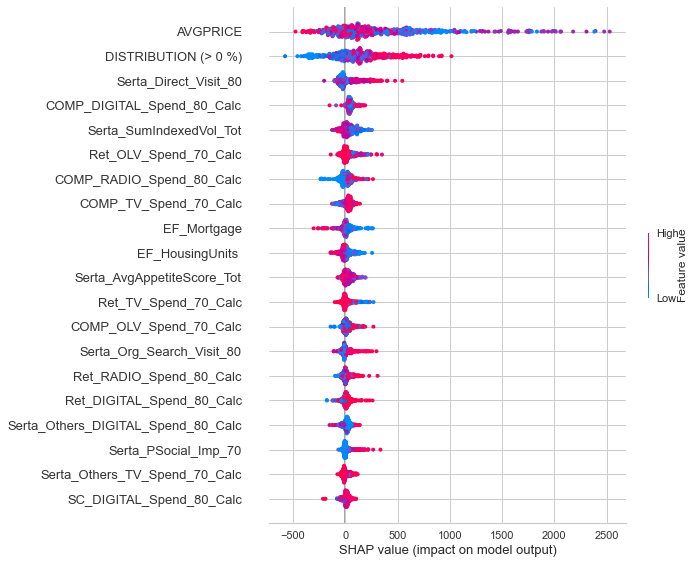

In [32]:
interpret_model(tuned_xgb)

In [33]:
### 12.0 Finalize Model for Deployment

final_xgb = finalize_model(tuned_xgb)

In [34]:
### 13.0 Predict

predict_model(final_xgb);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,86.0689,17830.8795,133.5323,0.9823,1.0799,4.3259


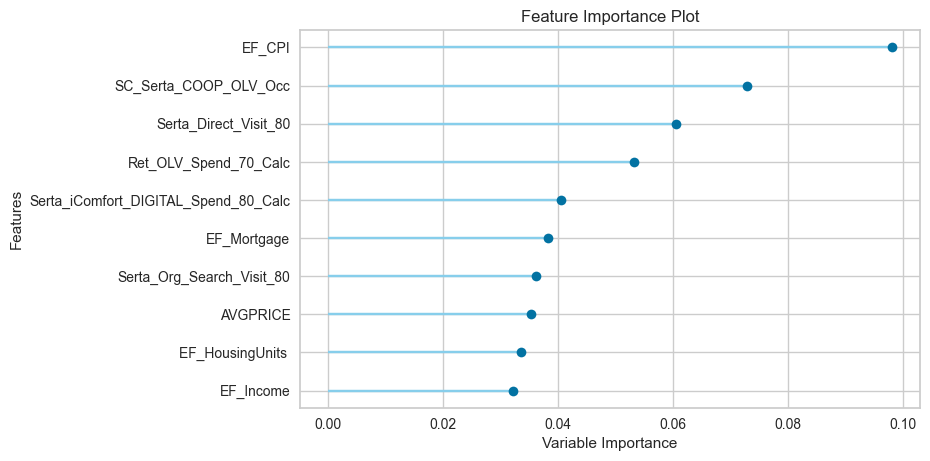

In [35]:
plot_model(final_xgb, plot='feature')

In [36]:
print(final_xgb.feature_importances_)

[0.03524297 0.01757372 0.07287356 0.00467982 0.00953812 0.0240025
 0.00104124 0.00640817 0.0197912  0.03352395 0.03823713 0.03213682
 0.02909691 0.09808648 0.02180739 0.04048617 0.02716802 0.02487239
 0.00696245 0.01982238 0.0204899  0.0160051  0.02006598 0.03107018
 0.00802728 0.0280965  0.02336265 0.01951807 0.0264782  0.01489245
 0.05317834 0.01921398 0.02182906 0.01117509 0.01587757 0.00443113
 0.03614572 0.00624793 0.06054355]


In [37]:
fi = pd.DataFrame(final_xgb.feature_importances_)
fi.columns =['Imp Score']
print (fi)

    Imp Score
0    0.035243
1    0.017574
2    0.072874
3    0.004680
4    0.009538
5    0.024003
6    0.001041
7    0.006408
8    0.019791
9    0.033524
10   0.038237
11   0.032137
12   0.029097
13   0.098086
14   0.021807
15   0.040486
16   0.027168
17   0.024872
18   0.006962
19   0.019822
20   0.020490
21   0.016005
22   0.020066
23   0.031070
24   0.008027
25   0.028097
26   0.023363
27   0.019518
28   0.026478
29   0.014892
30   0.053178
31   0.019214
32   0.021829
33   0.011175
34   0.015878
35   0.004431
36   0.036146
37   0.006248
38   0.060544


In [38]:
a = pd.DataFrame(data.columns)
a.columns =['Var Name']
# Droping Sales_Unit_Qty
a = a.iloc[1: , :]
a.reset_index(inplace = True)
print (a)

    index                               Var Name
0       1                               AVGPRICE
1       2              SC_Serta_COOP_Digital_Occ
2       3                  SC_Serta_COOP_OLV_Occ
3       4                   SC_Serta_COOP_TV_Occ
4       5             Serta_AvgAppetiteScore_Tot
5       6                Serta_SumIndexedVol_Tot
6       7                     SC_Serta_Rep_Promo
7       8                     SC_Serta_Net_Promo
8       9                   DISTRIBUTION (> 0 %)
9      10                       EF_HousingUnits 
10     11                            EF_Mortgage
11     12                              EF_Income
12     13                        EF_Unemployment
13     14                                 EF_CPI
14     15  Serta_PerfectSleeper_TV_Spend_70_Calc
15     16   Serta_iComfort_DIGITAL_Spend_80_Calc
16     17        Serta_iComfort_TV_Spend_70_Calc
17     18     Serta_Others_DIGITAL_Spend_80_Calc
18     19         Serta_Others_OLV_Spend_70_Calc
19     20          S

In [39]:
data_unseen.shape

(198, 40)

In [40]:
data.shape

(1779, 40)

In [41]:
print(data.columns)
print("----------------------------")
print(data.shape)

traindata = data.drop(['Sales_Unit_Qty'], axis=1)

print(traindata.shape)
print("----------------------------")

print(traindata.columns)

Index(['Sales_Unit_Qty', 'AVGPRICE', 'SC_Serta_COOP_Digital_Occ',
       'SC_Serta_COOP_OLV_Occ', 'SC_Serta_COOP_TV_Occ',
       'Serta_AvgAppetiteScore_Tot', 'Serta_SumIndexedVol_Tot',
       'SC_Serta_Rep_Promo', 'SC_Serta_Net_Promo', 'DISTRIBUTION (> 0 %)',
       'EF_HousingUnits ', 'EF_Mortgage', 'EF_Income', 'EF_Unemployment',
       'EF_CPI', 'Serta_PerfectSleeper_TV_Spend_70_Calc',
       'Serta_iComfort_DIGITAL_Spend_80_Calc',
       'Serta_iComfort_TV_Spend_70_Calc', 'Serta_Others_DIGITAL_Spend_80_Calc',
       'Serta_Others_OLV_Spend_70_Calc', 'Serta_Others_TV_Spend_70_Calc',
       'Serta_Others_RADIO_Spend_80_Calc', 'SC_DIGITAL_Spend_80_Calc',
       'SC_OLV_Spend_70_Calc', 'SC_TV_Spend_70_Calc', 'SC_RADIO_Spend_80_Calc',
       'COMP_DIGITAL_Spend_80_Calc', 'COMP_OLV_Spend_70_Calc',
       'COMP_TV_Spend_70_Calc', 'COMP_RADIO_Spend_80_Calc',
       'Ret_DIGITAL_Spend_80_Calc', 'Ret_OLV_Spend_70_Calc',
       'Ret_TV_Spend_70_Calc', 'Ret_PRINT_Spend_70_Calc',
       'Ret_R

In [42]:
traindata.shape

(1779, 39)

#### Using Shap library because  how each feature in your dataset contributes to a prediction, for each individual row 

In [43]:
import shap
shap_values = shap.TreeExplainer(final_xgb).shap_values(traindata)
print(shap_values)

[[ 2.2651428e+03  4.1204247e+01  6.1273193e+00 ...  2.3132812e+01
   5.8596883e+00  2.3647629e+01]
 [ 1.1749514e+03 -1.7645844e+01  1.1646696e+01 ...  5.3709206e+01
  -1.4004152e+01  2.5538002e+02]
 [ 6.6326031e+02 -2.4824398e+01  4.9948068e+00 ...  4.2271751e+01
   1.3980169e+01 -1.5534471e+01]
 ...
 [ 2.1281110e+02  1.6262473e+00  2.7709808e+00 ...  2.8848822e+02
   1.5763283e+01 -5.0389973e+01]
 [ 1.4944275e+02  9.4393959e+00  3.7465200e+00 ... -3.9375385e+01
  -9.4192845e-01 -1.9910828e+01]
 [ 1.7882687e+02  2.8698606e+00  8.3790150e+00 ...  4.7383961e+01
  -3.9166073e+01  4.5224834e+01]]


                                 Variable    SHAP_abs      Corr  Sign
6                      SC_Serta_Rep_Promo    0.322326  0.349067   red
24                 SC_RADIO_Spend_80_Calc    1.074477  0.514070   red
18         Serta_Others_OLV_Spend_70_Calc    1.241367 -0.552103  blue
35                       Serta_CTV_Imp_70    2.542600 -0.325639  blue
3                    SC_Serta_COOP_TV_Occ    3.080891  0.461226   red
2                   SC_Serta_COOP_OLV_Occ    8.245580 -0.691503  blue
14  Serta_PerfectSleeper_TV_Spend_70_Calc   10.023679  0.782854   red
20       Serta_Others_RADIO_Spend_80_Calc   11.396185  0.625285   red
37                   Serta_PSearch_Imp_80   12.063698 -0.303050  blue
7                      SC_Serta_Net_Promo   13.558472  0.351509   red
22                   SC_OLV_Spend_70_Calc   13.943063  0.424614   red
16        Serta_iComfort_TV_Spend_70_Calc   14.353980 -0.134784  blue
13                                 EF_CPI   19.251505 -0.445269  blue
31                  

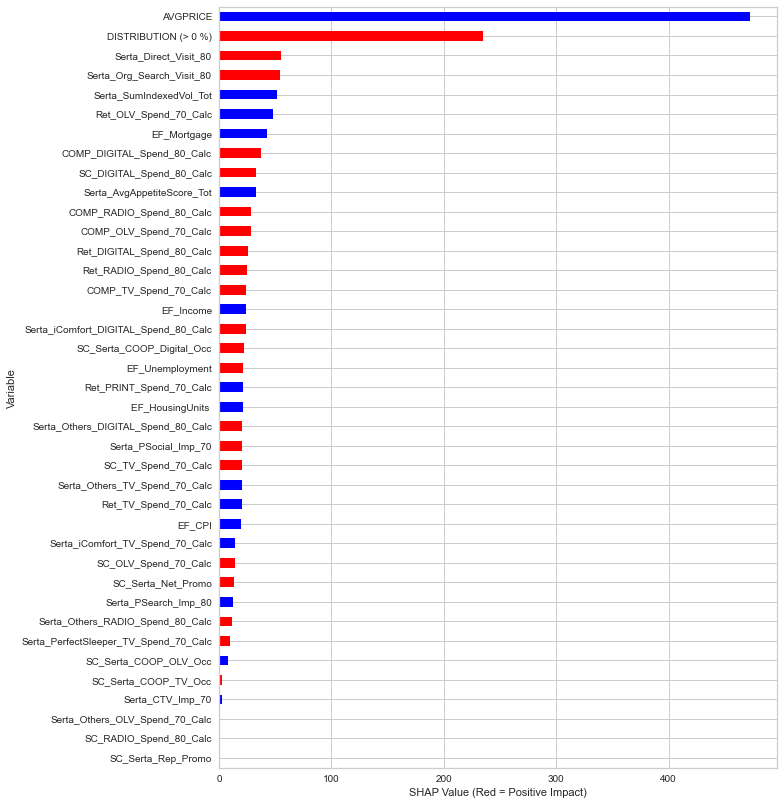

In [45]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    
    #print(shap_v) 
    
    feature_list = df.columns
    
    #print(feature_list) 
    
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)
    
    #print(df_v) 
    
    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        
        #print(b)
        
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    #print(corr_df)
    
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')
    #print(corr_df)
    
    # Plot it
    shap_abs = np.abs(shap_v)
    #print(shap_abs)
    
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    #print(k)
    
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    print(k2)
    
    
    colorlist = k2['Sign']
    
    #ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(5,6),legend=False)
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(10,14),legend=False)
    
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")
    
ABS_SHAP(shap_values,traindata)

In [46]:
TestData_final_xgb = predict_model(final_xgb, data=data_unseen)
TestData_final_xgb.head()

,Sales_Unit_Qty,AVGPRICE,SC_Serta_COOP_Digital_Occ,SC_Serta_COOP_OLV_Occ,SC_Serta_COOP_TV_Occ,Serta_AvgAppetiteScore_Tot,Serta_SumIndexedVol_Tot,SC_Serta_Rep_Promo,SC_Serta_Net_Promo,DISTRIBUTION (> 0 %),...,Ret_OLV_Spend_70_Calc,Ret_TV_Spend_70_Calc,Ret_PRINT_Spend_70_Calc,Ret_RADIO_Spend_80_Calc,Serta_PSocial_Imp_70,Serta_CTV_Imp_70,Serta_Org_Search_Visit_80,Serta_PSearch_Imp_80,Serta_Direct_Visit_80,Label
0,1,499,84.00,0.0,0.00,84.87,129656.53,0.00,0.24,1.57,...,12428.741373,12371.697835,12225.359615,11989.201618,0.0,0.0,0.0,0.0,0.0,-87.923462
9,15,698,0.68,0.0,1.59,72.44,133820.92,0.00,0.12,1.35,...,12392.477909,12368.833263,12223.268978,10618.079006,0.0,0.0,0.0,0.0,0.0,21.021358
15,1,599,0.68,0.0,0.00,83.53,160197.12,0.00,0.10,1.16,...,12410.263749,12367.447948,12218.835088,11496.774064,0.0,0.0,0.0,0.0,0.0,-18.102539
18,5,499,0.68,0.0,0.00,67.79,143833.16,0.12,0.12,1.43,...,12408.856264,12356.029398,12210.278507,11738.376289,0.0,0.0,0.0,0.0,0.0,-113.381706
24,4,352,84.00,0.0,0.00,83.68,129869.66,0.00,0.50,19.23,...,12432.589454,12372.985270,12230.038537,11789.745623,0.0,0.0,0.0,0.0,0.0,156.882019


In [47]:
TestData_final_xgb.shape

(198, 41)

In [48]:
TrainData_final_xgb = predict_model(final_xgb, data=data)
TrainData_final_xgb.head()

,Sales_Unit_Qty,AVGPRICE,SC_Serta_COOP_Digital_Occ,SC_Serta_COOP_OLV_Occ,SC_Serta_COOP_TV_Occ,Serta_AvgAppetiteScore_Tot,Serta_SumIndexedVol_Tot,SC_Serta_Rep_Promo,SC_Serta_Net_Promo,DISTRIBUTION (> 0 %),...,Ret_OLV_Spend_70_Calc,Ret_TV_Spend_70_Calc,Ret_PRINT_Spend_70_Calc,Ret_RADIO_Spend_80_Calc,Serta_PSocial_Imp_70,Serta_CTV_Imp_70,Serta_Org_Search_Visit_80,Serta_PSearch_Imp_80,Serta_Direct_Visit_80,Label
584,3477,417,0.46,0.0,0.0,75.65,121146.75,0.0,0.12,22.53,...,12432.647005,12370.079124,12231.417950,10256.468282,0.00,0.00,0.00,0.00,0.00,3400.542236
1542,1658,457,0.00,0.0,0.0,74.26,34068.75,0.0,0.46,80.18,...,10908.404614,11596.053900,11856.819383,12108.629744,832417.50,223696.00,29724.72,723047.68,14128.64,2043.427490
1622,928,200,0.00,0.0,0.0,70.64,170234.82,0.0,0.24,78.38,...,12290.064292,12380.312134,12229.900250,10685.014698,2341398.53,0.00,27982.84,117434.88,9076.52,1300.281494
1223,899,300,0.68,0.0,0.0,79.00,64738.02,0.0,0.90,73.83,...,11612.896080,11118.083241,11889.878420,12114.492343,6800537.98,152845.07,29202.88,2432682.08,18595.32,899.911377
216,40,613,0.00,0.0,0.0,80.50,137820.80,0.0,0.12,1.65,...,12433.797995,12372.146238,12226.277023,11272.188342,0.00,0.00,0.00,0.00,0.00,46.149536


In [49]:
TrainData_final_xgb.shape

(1779, 41)

In [51]:
AllData_final_xgb = predict_model(final_xgb, data=my_data)
AllData_final_xgb.head()

,Sales_Unit_Qty,AVGPRICE,SC_Serta_COOP_Digital_Occ,SC_Serta_COOP_OLV_Occ,SC_Serta_COOP_TV_Occ,Serta_AvgAppetiteScore_Tot,Serta_SumIndexedVol_Tot,SC_Serta_Rep_Promo,SC_Serta_Net_Promo,DISTRIBUTION (> 0 %),...,Ret_OLV_Spend_70_Calc,Ret_TV_Spend_70_Calc,Ret_PRINT_Spend_70_Calc,Ret_RADIO_Spend_80_Calc,Serta_PSocial_Imp_70,Serta_CTV_Imp_70,Serta_Org_Search_Visit_80,Serta_PSearch_Imp_80,Serta_Direct_Visit_80,Label
0,1,499,84.00,0.0,0.0,84.87,129656.53,0.0,0.24,1.57,...,12428.741373,12371.697835,12225.359615,11989.201618,0.0,0.0,0.0,0.0,0.0,-87.923462
1,3,499,59.71,0.0,0.0,80.22,135254.24,0.0,0.76,1.52,...,12432.129038,12378.610635,12162.056020,11692.369118,0.0,0.0,0.0,0.0,0.0,-26.766567
2,1,499,27.33,0.0,0.0,82.91,125642.82,0.0,0.90,1.56,...,12431.923492,12386.827423,12204.938438,10991.081243,0.0,0.0,0.0,0.0,0.0,-11.403712
3,1,499,27.33,0.0,0.0,78.32,89354.17,0.0,0.90,1.47,...,12432.770328,12388.135595,12223.245187,11471.687483,0.0,0.0,0.0,0.0,0.0,-6.293364
4,5,698,0.24,0.0,0.0,73.72,130312.17,0.0,0.12,1.22,...,12429.687016,12377.873494,12228.960695,11064.929523,0.0,0.0,0.0,0.0,0.0,-115.127892


In [52]:
AllData_final_xgb.shape

(1977, 41)

In [53]:
print('Overall Data - Actual : ' + str(AllData_final_xgb['Sales_Unit_Qty'].sum()))
print('Overall Data - Pred : ' + str(AllData_final_xgb['Label'].sum()))
print('--------------------------------------------------------------')
print('Train Data - Actual : ' + str(AllData_final_xgb['Sales_Unit_Qty'].sum() - TestData_final_xgb['Sales_Unit_Qty'].sum()))
print('Train Data - Pred : ' + str(AllData_final_xgb['Label'].sum() - TestData_final_xgb['Label'].sum()))
print('--------------------------------------------------------------')
print('Test Data - Actual : ' + str(TestData_final_xgb['Sales_Unit_Qty'].sum()))
print('Test Data - Pred : ' + str(TestData_final_xgb['Label'].sum()))

Overall Data - Actual : 1815369
Overall Data - Pred : 1805845.0
--------------------------------------------------------------
Train Data - Actual : 1638658
Train Data - Pred : 1632400.5
--------------------------------------------------------------
Test Data - Actual : 176711
Test Data - Pred : 173444.44


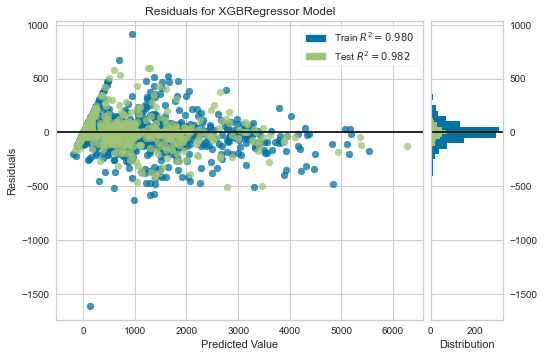

In [54]:
plot_model(final_xgb)

In [ ]:
#---------------------------------------------------------------------------------------#

In [ ]:
#---------------------------------------------------------------------------------------#

In [ ]:
#---------------------------------------------------------------------------------------#

<h2 style="color: red;">END</h2> 

In [ ]:
#---------------------------------------------------------------------------------------#

In [ ]:
#---------------------------------------------------------------------------------------#